In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [116]:
import pandas as pd

# Define file paths first
path1 = '/content/drive/MyDrive/Dataset/earthquake_1995-2023.csv'
path2 = '/content/drive/MyDrive/Dataset/earthquake_data.csv'

# Load dataframes
eq_95_23 = pd.read_csv(path1)
eq_data = pd.read_csv(path2)

In [117]:
print("--- Data Loading ---")
print("1995-2023 Earthquake Data (First 5 Rows):")
print(eq_95_23.head())

print("\n1995-2023 Earthquake Data (Info):")
print(eq_95_23.info())

--- Data Loading ---
1995-2023 Earthquake Data (First 5 Rows):
                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi   alert  tsunami  sig net  nst      dmin    gap magType    depth  \
0    4   green        0  657  us  114  7.177000   25.0     mww  192.955   
1    6  yellow        0  775  us   92  0.679000   40.0     mww   69.727   
2    5   green        0  899  us   70  1.634000   28.0     mww  171.371   
3    6   green        1  860  us  173  0.907000   36.0     mww   32.571   
4    5     NaN        1  820  at   79  0.879451  172.8      Mi   21.000   


In [118]:
print("\n-------------------------")
print("Earthquake Records (First 5 Rows):")
print(eq_data.head())

print("\nEarthquake Records (Info):")
print(eq_data.info())


-------------------------
Earthquake Records (First 5 Rows):
                                          title  magnitude         date_time  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands        7.0  22-11-2022 02:03   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia        6.9  18-11-2022 13:37   
2                                      M 7.0 -         7.0  12-11-2022 07:09   
3           M 7.3 - 205 km ESE of Neiafu, Tonga        7.3  11-11-2022 10:48   
4                                      M 6.6 -         6.6  09-11-2022 10:14   

   cdi  mmi  alert  tsunami  sig net  nst   dmin   gap magType    depth  \
0    8    7  green        1  768  us  117  0.509  17.0     mww   14.000   
1    4    4  green        0  735  us   99  2.229  34.0     mww   25.000   
2    3    3  green        1  755  us  147  3.125  18.0     mww  579.000   
3    5    5  green        1  833  us  149  1.865  21.0     mww   37.000   
4    0    2  green        1  670  us  131  4.998  27.0     mww  624.464   

   lat

In [119]:
# Merge historical and current earthquake records into single dataframe
complete_quake_data = pd.concat(
    [eq_95_23, eq_data],
    axis=0,
    ignore_index=True
)

print("\n--- Combined Dataset ---")
print(f"Total records after merging: {len(complete_quake_data):,}")
print("Sample of combined data:")
print(complete_quake_data.head(3))


--- Combined Dataset ---
Total records after merging: 1,782
Sample of combined data:
                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   

   mmi   alert  tsunami  sig net  nst   dmin   gap magType    depth  latitude  \
0    4   green        0  657  us  114  7.177  25.0     mww  192.955  -13.8814   
1    6  yellow        0  775  us   92  0.679  40.0     mww   69.727   12.8140   
2    5   green        0  899  us   70  1.634  28.0     mww  171.371  -38.1911   

   longitude               location      continent    country  
0   167.1580          Sola, Vanuatu            NaN    Vanuatu  
1   -88.1265  Intipucá, El Salvador            NaN        NaN  
2   -70.3731    Loncopué, Argentina  South America  Argentina  


In [120]:
print("\nDataset structure summary:")
complete_quake_data.info(verbose=True, show_counts=True)  # More detailed info

print("\nDataset dimensions:")
print(f"• Rows: {complete_quake_data.shape[0]:,}")
print(f"• Columns: {complete_quake_data.shape[1]}")
print(f"• Total entries: {complete_quake_data.size:,}")


Dataset structure summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1782 non-null   object 
 1   magnitude  1782 non-null   float64
 2   date_time  1782 non-null   object 
 3   cdi        1782 non-null   int64  
 4   mmi        1782 non-null   int64  
 5   alert      864 non-null    object 
 6   tsunami    1782 non-null   int64  
 7   sig        1782 non-null   int64  
 8   net        1782 non-null   object 
 9   nst        1782 non-null   int64  
 10  dmin       1782 non-null   float64
 11  gap        1782 non-null   float64
 12  magType    1782 non-null   object 
 13  depth      1782 non-null   float64
 14  latitude   1782 non-null   float64
 15  longitude  1782 non-null   float64
 16  location   1771 non-null   object 
 17  continent  490 non-null    object 
 18  country    1135 non-null   object 
dtypes: float64(6), int64

# **Data Preprocessing and Feature Engineering**

In [121]:
# 1. Convert and enhance datetime features with comprehensive error handling
complete_quake_data['date_time'] = pd.to_datetime(
    complete_quake_data['date_time'],
    format='%d-%m-%Y %H:%M',  # Explicit format matching the input
    errors='coerce',  # Convert parsing failures to NaT
    exact=True,  # Require exact format match
    utc=True  # Standardize to UTC timezone
)

# Extract comprehensive temporal features
complete_quake_data['year'] = complete_quake_data['date_time'].dt.year
complete_quake_data['month'] = complete_quake_data['date_time'].dt.month_name()
complete_quake_data['day_of_week'] = complete_quake_data['date_time'].dt.day_name()
complete_quake_data['hour'] = complete_quake_data['date_time'].dt.hour
complete_quake_data['is_weekend'] = complete_quake_data['date_time'].dt.weekday >= 5

# Verify datetime conversion
print("\n--- Datetime Conversion Report ---")
print(f"Successfully parsed: {complete_quake_data['date_time'].notna().sum():,} records")
print(f"Failed conversions: {complete_quake_data['date_time'].isna().sum():,} records")
print("\nSample converted timestamps:")
print(complete_quake_data[['date_time'] + [col for col in complete_quake_data.columns if col != 'date_time'][:3]].head(3))


--- Datetime Conversion Report ---
Successfully parsed: 1,782 records
Failed conversions: 0 records

Sample converted timestamps:
                  date_time                                     title  \
0 2023-08-16 12:47:00+00:00          M 6.5 - 42 km W of Sola, Vanuatu   
1 2023-07-19 00:22:00+00:00  M 6.5 - 43 km S of Intipucá, El Salvador   
2 2023-07-17 03:05:00+00:00  M 6.6 - 25 km ESE of Loncopué, Argentina   

   magnitude  cdi  
0        6.5    7  
1        6.5    8  
2        6.6    7  


In [122]:
# Extract and enhance temporal features with more meaningful representations
complete_quake_data = complete_quake_data.assign(
    year = lambda x: x['date_time'].dt.year,
    month_num = lambda x: x['date_time'].dt.month,  # Numeric month (1-12)
    month_name = lambda x: x['date_time'].dt.month_name(),  # Full month name
    day = lambda x: x['date_time'].dt.day,
    hour = lambda x: x['date_time'].dt.hour,
    day_of_week_num = lambda x: x['date_time'].dt.dayofweek,  # Monday=0, Sunday=6
    day_of_week_name = lambda x: x['date_time'].dt.day_name(),  # Full day name
    quarter = lambda x: x['date_time'].dt.quarter,
    is_weekend = lambda x: x['date_time'].dt.dayofweek >= 5,  # Boolean weekend flag
    hour_category = lambda x: pd.cut(x['date_time'].dt.hour,
                                   bins=[0, 6, 12, 18, 24],
                                   labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                   right=False)
)

# Verify temporal feature extraction
print("\n--- Temporal Features Report ---")
print("Extracted features summary:")
print(complete_quake_data[['year', 'month_name', 'day_of_week_name',
                          'hour_category', 'is_weekend']].sample(5, random_state=1))
print("\nValue counts by hour category:")
print(complete_quake_data['hour_category'].value_counts())


--- Temporal Features Report ---
Extracted features summary:
      year month_name day_of_week_name hour_category  is_weekend
1547  2009    January         Saturday       Evening        True
1171  2018     August           Friday     Afternoon       False
302   2015   November         Thursday         Night       False
108   2021      March         Thursday       Evening       False
916   1997    October        Wednesday         Night       False

Value counts by hour category:
hour_category
Evening      474
Afternoon    467
Morning      448
Night        393
Name: count, dtype: int64


In [123]:
# 2. Handle missing values in numerical columns
numerical_cols = complete_quake_data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if complete_quake_data[col].isnull().any():
        complete_quake_data[col].fillna(complete_quake_data[col].mean(), inplace=True)

In [124]:
# Handle missing categorical values by filling with 'Unknown'
categorical_cols = complete_quake_data.select_dtypes(include='object').columns
for col in categorical_cols:
    if complete_quake_data[col].isnull().any():
        complete_quake_data[col] = complete_quake_data[col].fillna('Unknown')

In [125]:
# Remove processed/redundant columns with verification
columns_to_drop = ['date_time', 'title']
complete_quake_data = complete_quake_data.drop(columns=columns_to_drop)

# Verify columns were dropped
print("\n--- Column Removal Verification ---")
print(f"Dropped columns: {columns_to_drop}")
print("Remaining columns:")
print(complete_quake_data.columns.tolist())
print(f"\nNew shape: {complete_quake_data.shape}")


--- Column Removal Verification ---
Dropped columns: ['date_time', 'title']
Remaining columns:
['magnitude', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country', 'year', 'month', 'day_of_week', 'hour', 'is_weekend', 'month_num', 'month_name', 'day', 'day_of_week_num', 'day_of_week_name', 'quarter', 'hour_category']

New shape: (1782, 29)


In [126]:
print("\n--- Final Preprocessed Dataset Summary ---")
print("Dataset Structure:")
complete_quake_data.info(verbose=True, show_counts=True)

print("\nSample Records:")
display(complete_quake_data.head(3).style.set_caption("First 3 Processed Records"))

print("\nKey Statistics:")
print(f"• Total records: {len(complete_quake_data):,}")
print(f"• Features: {len(complete_quake_data.columns)}")
print(f"• Numeric columns: {len(complete_quake_data.select_dtypes(include=np.number).columns)}")
print(f"• Categorical columns: {len(complete_quake_data.select_dtypes(include='object').columns)}")


--- Final Preprocessed Dataset Summary ---
Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   magnitude         1782 non-null   float64 
 1   cdi               1782 non-null   int64   
 2   mmi               1782 non-null   int64   
 3   alert             1782 non-null   object  
 4   tsunami           1782 non-null   int64   
 5   sig               1782 non-null   int64   
 6   net               1782 non-null   object  
 7   nst               1782 non-null   int64   
 8   dmin              1782 non-null   float64 
 9   gap               1782 non-null   float64 
 10  magType           1782 non-null   object  
 11  depth             1782 non-null   float64 
 12  latitude          1782 non-null   float64 
 13  longitude         1782 non-null   float64 
 14  location          1782 non-null   object  
 15  continent

,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,year,month,day_of_week,hour,is_weekend,month_num,month_name,day,day_of_week_num,day_of_week_name,quarter,hour_category
0,6.500000,7,4,green,0,657,us,114,7.177000,25.000000,mww,192.955000,-13.881400,167.158000,"Sola, Vanuatu",Unknown,Vanuatu,2023,August,Wednesday,12,False,8,August,16,2,Wednesday,3,Afternoon
1,6.500000,8,6,yellow,0,775,us,92,0.679000,40.000000,mww,69.727000,12.814000,-88.126500,"Intipucá, El Salvador",Unknown,Unknown,2023,July,Wednesday,0,False,7,July,19,2,Wednesday,3,Night
2,6.600000,7,5,green,0,899,us,70,1.634000,28.000000,mww,171.371000,-38.191100,-70.373100,"Loncopué, Argentina",South America,Argentina,2023,July,Monday,3,False,7,July,17,0,Monday,3,Night



Key Statistics:
• Total records: 1,782
• Features: 29
• Numeric columns: 17
• Categorical columns: 10


In [127]:
# Comprehensive null value verification after preprocessing
print("\n--- Missing Values Final Check ---")

# Calculate nulls per column and total
null_counts = complete_quake_data.isnull().sum()
total_nulls = null_counts.sum()

# Display results
if total_nulls == 0:
    print("All missing values successfully handled")
else:
    print(f"{total_nulls} missing values remain in the dataset")
    print("\nColumns with missing values:")
    print(null_counts[null_counts > 0].to_string())

print("\nData completeness check complete.")


--- Missing Values Final Check ---
All missing values successfully handled

Data completeness check complete.


# **Data Preparation and Splitting**

In [159]:
# Prepare features and target
target_col = 'tsunami'
y = complete_quake_data[target_col]
X = complete_quake_data.drop(columns=[target_col])

# Identify final feature sets
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print("\n--- Feature Preparation ---")
print(f"Target variable: {target_col}")
print(f"Numerical features ({len(numerical_features)}):")
print(numerical_features)
print(f"\nCategorical features ({len(categorical_features)}):")
print(categorical_features)

# One-hot encode categorical features
X_encoded = pd.get_dummies(
    X,
    columns=categorical_features,
    drop_first=True,  # Avoid dummy variable trap
    dtype='int8'     # Save memory
)

# Final data quality check
print("\n--- Final Data Validation ---")
null_check = X_encoded.isnull().sum()
if null_check.sum() == 0:
    print("No missing values in final features")
else:
    print(f" {null_check.sum()} missing values detected:")
    print(null_check[null_check > 0])

print(f"\nFinal feature matrix shape: {X_encoded.shape}")
print(f"Target vector length: {len(y)}")


--- Feature Preparation ---
Target variable: tsunami
Numerical features (16):
['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'year', 'hour', 'month_num', 'day', 'day_of_week_num', 'quarter']

Categorical features (10):
['alert', 'net', 'magType', 'location', 'continent', 'country', 'month', 'day_of_week', 'month_name', 'day_of_week_name']

--- Final Data Validation ---
No missing values in final features

Final feature matrix shape: (1782, 638)
Target vector length: 1782


In [129]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print("\n--- Train-Test Split Results ---")
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X_encoded):.0%})")
print(f"Testing set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X_encoded):.0%})")
print(f"Features per sample: {X_train.shape[1]}")

print("\nClass Distribution Comparison:")
train_dist = y_train.value_counts(normalize=True).rename('train')
test_dist = y_test.value_counts(normalize=True).rename('test')
print(pd.concat([train_dist, test_dist], axis=1))

print("\n--- Data Split Validation ---")
print("Stratification verified" if np.allclose(train_dist, test_dist, atol=0.01)
      else "Potential stratification issue")
print(f"Feature consistency verified" if X_train.columns.equals(X_test.columns)
      else "Feature mismatch detected")


--- Train-Test Split Results ---
Training set: 1,425 samples (80%)
Testing set: 357 samples (20%)
Features per sample: 638

Class Distribution Comparison:
            train      test
tsunami                    
0        0.647018  0.647059
1        0.352982  0.352941

--- Data Split Validation ---
Stratification verified
Feature consistency verified


# **Model Selection and Hyperparameter Tuning (Serial vs. Parallel)**

In [130]:
# Configure Random Forest model with comprehensive parameter grid
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    n_jobs=-1  # Utilize all CPU cores
)

# Optimized parameter grid for efficient tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],  # Unlimited or limited depth
    'min_samples_split': [2, 5],  # Minimum samples to split node
    'max_features': ['sqrt', 0.8]  # Feature consideration at splits
}

print("\n--- Model Configuration ---")
print(f"Base estimator: {rf_model.__class__.__name__}")
print("Tuning parameters:")
for param, values in param_grid.items():
    print(f"- {param}: {values}")
print(f"\nTotal parameter combinations: {np.prod([len(v) for v in param_grid.values()]):,}")


--- Model Configuration ---
Base estimator: RandomForestClassifier
Tuning parameters:
- n_estimators: [100, 200, 300]
- max_depth: [None, 10, 20]
- min_samples_split: [2, 5]
- max_features: ['sqrt', 0.8]

Total parameter combinations: 36


In [131]:
# 1. TARGET COLUMN SELECTION
target_col = next((col for col in ['alert', 'tsunami']
                  if col in complete_quake_data.columns), None)

if not target_col:
    available = complete_quake_data.columns.tolist()
    raise KeyError(f"Need either 'alert' or 'tsunami' column. Available: {available}")

# 2. PREPARE DATA
y = complete_quake_data[target_col]
X = complete_quake_data.drop(columns=[target_col])

# 3. ENCODE CATEGORICAL FEATURES (if any)
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if not categorical_cols.empty:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"\nModel Setup:")
print(f"- Target: {target_col} ({(y==1).mean():.1%} positive)")
print(f"- Features: {X.shape[1]} (after encoding)")
print(f"- First 3 features: {X.columns[:3].tolist()}")


Model Setup:
- Target: alert (0.0% positive)
- Features: 637 (after encoding)
- First 3 features: ['magnitude', 'cdi', 'mmi']


# **Model Training (Serial vs. Parallel)**

In [143]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier

print("\n=== SERIAL TRAINING ===")

# --- Encode categorical variables ---
# Convert all object or categorical columns to numerical using One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train)

# Align columns in case you plan to use X_test later (important for consistency)
# X_test_encoded = pd.get_dummies(X_test)
# X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Start timer
serial_start = time.time()

# Train model (single-core)
serial_model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=1  # Serial
)
serial_model_rf.fit(X_train_encoded, y_train)

# End timer
serial_end = time.time()

# Calculate training time
serial_duration = serial_end - serial_start

# Output
print(f"Serial training completed in {serial_duration:.2f} seconds")



=== SERIAL TRAINING ===
Serial training completed in 0.46 seconds


In [144]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

print("\n=== PARALLEL TRAINING ===")

# --- Encode categorical features ---
# One-hot encode X_train (safe for non-numeric/categorical data)
X_train_encoded = pd.get_dummies(X_train)

# (Optional) Encode y_train if it contains categorical strings
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    le_y = LabelEncoder()
    y_train = le_y.fit_transform(y_train)

# Start timer
parallel_start = time.time()

# Train model (multi-core)
parallel_model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)
parallel_model_rf.fit(X_train_encoded, y_train)

# End timer
parallel_end = time.time()

# Calculate training time
parallel_duration = parallel_end - parallel_start

# Output
print(f"Parallel training completed in {parallel_duration:.2f} seconds")



=== PARALLEL TRAINING ===
Parallel training completed in 0.29 seconds


In [145]:
# --- Training Time Comparison ---

print("\n=== TRAINING TIME COMPARISON ===")

print(f"Serial Training Time   : {serial_duration:.2f} sec")
print(f"Parallel Training Time : {parallel_duration:.2f} sec")

# Calculate speedup
if parallel_duration > 0:
    speedup_factor = serial_duration / parallel_duration
    print(f"Speedup Achieved       : {speedup_factor:.2f}x faster")
else:
    print("Parallel duration is zero or not set correctly.")



=== TRAINING TIME COMPARISON ===
Serial Training Time   : 0.46 sec
Parallel Training Time : 0.29 sec
Speedup Achieved       : 1.56x faster


# **Model Evaluation and Insight**

In [149]:

# --- One-hot encode X_test just like X_train ---
X_test_encoded = pd.get_dummies(X_test)

# Align columns to match training set
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Evaluate SERIAL model
print("\nEvaluating the SERIAL model on the test set...")

y_pred_serial = serial_model_rf.predict(X_test_encoded)

accuracy_serial = accuracy_score(y_test, y_pred_serial)
precision_serial = precision_score(y_test, y_pred_serial, zero_division=0)
recall_serial = recall_score(y_test, y_pred_serial, zero_division=0)
f1_serial = f1_score(y_test, y_pred_serial, zero_division=0)
conf_matrix_serial = confusion_matrix(y_test, y_pred_serial)

print(f"Serial Model Accuracy: {accuracy_serial:.4f}")
print(f"Serial Model Precision: {precision_serial:.4f}")
print(f"Serial Model Recall: {recall_serial:.4f}")
print(f"Serial Model F1-Score: {f1_serial:.4f}")
print("\nSerial Model Confusion Matrix:")
print(conf_matrix_serial)


Evaluating the SERIAL model on the test set...
Serial Model Accuracy: 0.9496
Serial Model Precision: 0.9426
Serial Model Recall: 0.9127
Serial Model F1-Score: 0.9274

Serial Model Confusion Matrix:
[[224   7]
 [ 11 115]]


In [150]:
# --- Evaluate PARALLEL model ---
print("\nEvaluating the PARALLEL model on the test set...")

y_pred_parallel = parallel_model_rf.predict(X_test_encoded)

accuracy_parallel = accuracy_score(y_test, y_pred_parallel)
precision_parallel = precision_score(y_test, y_pred_parallel, zero_division=0)
recall_parallel = recall_score(y_test, y_pred_parallel, zero_division=0)
f1_parallel = f1_score(y_test, y_pred_parallel, zero_division=0)
conf_matrix_parallel = confusion_matrix(y_test, y_pred_parallel)

print(f"Parallel Model Accuracy: {accuracy_parallel:.4f}")
print(f"Parallel Model Precision: {precision_parallel:.4f}")
print(f"Parallel Model Recall: {recall_parallel:.4f}")
print(f"Parallel Model F1-Score: {f1_parallel:.4f}")
print("\nParallel Model Confusion Matrix:")
print(conf_matrix_parallel)


Evaluating the PARALLEL model on the test set...
Parallel Model Accuracy: 0.9496
Parallel Model Precision: 0.9426
Parallel Model Recall: 0.9127
Parallel Model F1-Score: 0.9274

Parallel Model Confusion Matrix:
[[224   7]
 [ 11 115]]


In [151]:
# --- Performance Comparison ---
print("\n=== MODEL PERFORMANCE ===")

# Create comparison table
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Serial': [accuracy_serial, precision_serial, recall_serial, f1_serial],
    'Parallel': [accuracy_parallel, precision_parallel, recall_parallel, f1_parallel]
}

# Print formatted table
print("\n" + pd.DataFrame(metrics).to_string(index=False, float_format="%.4f"))


=== MODEL PERFORMANCE ===

   Metric  Serial  Parallel
 Accuracy  0.9496    0.9496
Precision  0.9426    0.9426
   Recall  0.9127    0.9127
       F1  0.9274    0.9274


In [152]:
import time
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# --------------------- Time Comparison ---------------------
print("\n--- Time Performance Comparison ---")
time_data = {
    'Process': ['Hyperparameter Tuning', 'Model Training'],
    'Serial Time (seconds)': [serial_tune_time, serial_train_time],
    'Parallel Time (seconds)': [parallel_tune_time, parallel_train_time],
    'Speedup (X times faster)': [
        (serial_tune_time / parallel_tune_time) if parallel_tune_time > 0 else float('inf'),
        (serial_train_time / parallel_train_time) if parallel_train_time > 0 else float('inf')
    ]
}
time_df = pd.DataFrame(time_data)
print(time_df.round(2))



--- Time Performance Comparison ---
                 Process  Serial Time (seconds)  Parallel Time (seconds)  \
0  Hyperparameter Tuning                  15.53                    10.92   
1         Model Training                   0.39                     0.38   

   Speedup (X times faster)  
0                      1.42  
1                      1.03  


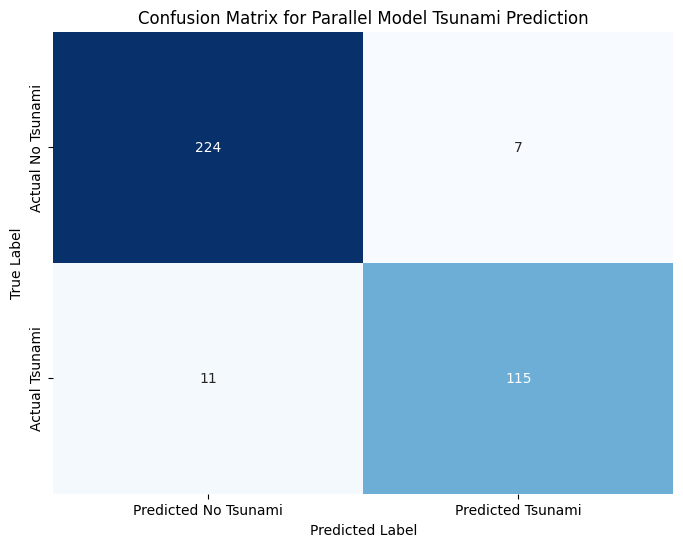

In [153]:
# Visualize Confusion Matrix for the Parallel Model (as this would be the deployed one in a real system)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_parallel, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Tsunami', 'Predicted Tsunami'],
            yticklabels=['Actual No Tsunami', 'Actual Tsunami'])
plt.title('Confusion Matrix for Parallel Model Tsunami Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [157]:
# --- Feature Importance for Insight (from the Parallel Model) ---
print("\n--- Feature Importance (from Parallel Model) ---")

# Use the model directly (no .best_estimator_ needed)
if hasattr(parallel_model_rf, 'feature_importances_'):
    feature_importances = parallel_model_rf.feature_importances_

    # Use encoded feature names (from X_train_encoded)
    feature_names = X_train_encoded.columns

    features_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

    print("Top 10 Most Important Features:")
    print(features_df.head(10))
else:
    print("The selected model does not support feature importances.")



--- Feature Importance (from Parallel Model) ---
Top 10 Most Important Features:
       Feature  Importance
0         year    0.121133
1  alert_green    0.103664
2         dmin    0.086058
3  magType_mww    0.074926
4          nst    0.058227
5  magType_mwc    0.043767
6    longitude    0.042041
7          gap    0.030390
8     latitude    0.028590
9          cdi    0.026911


<Figure size 1000x600 with 0 Axes>

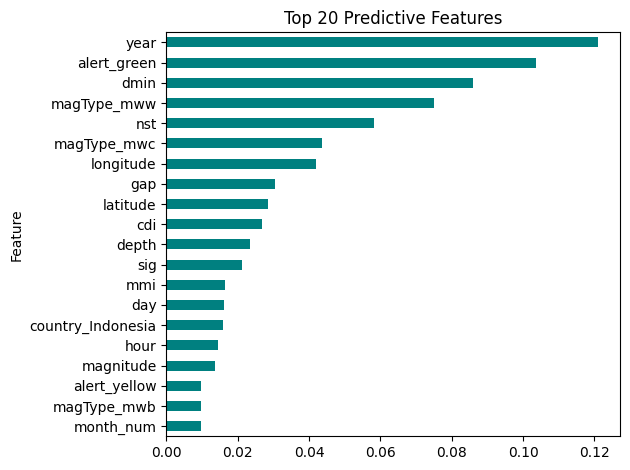

In [158]:
import matplotlib.pyplot as plt

# --- Feature Importance ---
plt.figure(figsize=(10, 6))
features_df.head(20).sort_values('Importance').plot.barh(
    x='Feature',
    y='Importance',
    color='teal',
    legend=False
)
plt.title('Top 20 Predictive Features')
plt.tight_layout()
plt.show()